In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Работа с деревьями решений и ансамблированием

В этой работе вам предстоит научиться предсказывать цены товаров из маркетплейса Amazon.

# Загрузка и подготовка данных

In [2]:
!gdown 18PVwZWFbpRbEHW-Hc8R0DUTl9CF1aQa0 -O data.csv

Downloading...
From: https://drive.google.com/uc?id=18PVwZWFbpRbEHW-Hc8R0DUTl9CF1aQa0
To: C:\Users\sav4u\3D Objects\тинька\data.csv

  0%|          | 0.00/30.0M [00:00<?, ?B/s]
  2%|1         | 524k/30.0M [00:00<00:17, 1.73MB/s]
  3%|3         | 1.05M/30.0M [00:00<00:11, 2.61MB/s]
  5%|5         | 1.57M/30.0M [00:00<00:09, 3.15MB/s]
  7%|6         | 2.10M/30.0M [00:00<00:09, 2.89MB/s]
 10%|#         | 3.15M/30.0M [00:00<00:05, 4.51MB/s]
 14%|#3        | 4.19M/30.0M [00:01<00:06, 3.84MB/s]
 17%|#7        | 5.24M/30.0M [00:01<00:05, 4.19MB/s]
 19%|#9        | 5.77M/30.0M [00:01<00:06, 3.78MB/s]
 23%|##2       | 6.82M/30.0M [00:01<00:05, 4.55MB/s]
 24%|##4       | 7.34M/30.0M [00:01<00:05, 4.40MB/s]
 26%|##6       | 7.86M/30.0M [00:02<00:05, 4.39MB/s]
 28%|##7       | 8.39M/30.0M [00:02<00:05, 4.18MB/s]
 30%|##9       | 8.91M/30.0M [00:02<00:05, 4.14MB/s]
 31%|###1      | 9.44M/30.0M [00:02<00:04, 4.13MB/s]
 33%|###3      | 9.96M/30.0M [00:02<00:04, 4.06MB/s]
 35%|###4      | 10.5M/30.0M 

In [3]:
df = pd.read_csv('data.csv').drop(columns=[
    'product_name',
    'index',
    'uniq_id',
    'customers_who_bought_this_item_also_bought',
    'items_customers_buy_after_viewing_this_item',
    'sellers',
    'description', # text
    'product_information', # text
    'product_description', # text
    'customer_questions_and_answers', # text
    'customer_reviews', # text
])

In [4]:
df.columns

Index(['manufacturer', 'price', 'number_available_in_stock',
       'number_of_reviews', 'number_of_answered_questions',
       'average_review_rating', 'amazon_category_and_sub_category'],
      dtype='object')

In [5]:
X, y = df.drop(columns=['price']), df.price

## Очистка данных (1 балл)

Посмотрите на признаки. Есть ли в них пропуски? Какое соотношение между NaN'ами и общим количеством данных? Есть ли смысл выкидывать какие-либо данные из этого датасета?

In [6]:
df.shape

(8547, 7)

Колонки с пропусками

In [7]:
df.isna().any()

manufacturer                         True
price                               False
number_available_in_stock            True
number_of_reviews                    True
number_of_answered_questions         True
average_review_rating                True
amazon_category_and_sub_category     True
dtype: bool

соотношение между NaN'ами и общим количеством данных

In [8]:
df.isna().sum() / df.shape[0]

manufacturer                        0.000585
price                               0.000000
number_available_in_stock           0.258687
number_of_reviews                   0.001755
number_of_answered_questions        0.078741
average_review_rating               0.001755
amazon_category_and_sub_category    0.064350
dtype: float64

In [9]:
df.isna().sum()

manufacturer                           5
price                                  0
number_available_in_stock           2211
number_of_reviews                     15
number_of_answered_questions         673
average_review_rating                 15
amazon_category_and_sub_category     550
dtype: int64

выкинем из датафрейма те индексы, в которых NaN больше 2

In [10]:
df = df.drop(index=df[df.isna().sum(axis=1) > 2].index)

In [11]:
df.shape

(8533, 7)

In [12]:
df.isna().sum()

manufacturer                           4
price                                  0
number_available_in_stock           2201
number_of_reviews                     10
number_of_answered_questions         665
average_review_rating                 10
amazon_category_and_sub_category     536
dtype: int64

In [13]:
df

,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category
0,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
1,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
2,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
3,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
4,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
...,...,...,...,...,...,...,...
8542,Mattel,£22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...
8543,Star Wars,£39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys
8544,Olde Scotland Yard Ltd.,£43.99,3 new,1,3.0,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...
8545,DC Comics,£49.81,3 new,1,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...


In [14]:
from sklearn.model_selection import train_test_split
X, y = df.drop(columns=['price']), df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, random_state=42)

## Подготовка данных 


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8533 entries, 0 to 8546
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   manufacturer                      8529 non-null   object 
 1   price                             8533 non-null   object 
 2   number_available_in_stock         6332 non-null   object 
 3   number_of_reviews                 8523 non-null   object 
 4   number_of_answered_questions      7868 non-null   float64
 5   average_review_rating             8523 non-null   object 
 6   amazon_category_and_sub_category  7997 non-null   object 
dtypes: float64(1), object(6)
memory usage: 533.3+ KB


Видно, что есть колонка вещественного типа данных, заменим ее элементы None на среднее

In [16]:
sr = X_train.number_of_answered_questions.mean(numeric_only=True)
sr

1.8744851931751323

In [17]:
X_train.number_of_answered_questions.fillna(value=sr, inplace=True)
X_test.number_of_answered_questions.fillna(value=sr, inplace=True)

In [18]:
print("Кол-во None train в number_of_answered_questions =", X_train.number_of_answered_questions.isna().sum())
print("Кол-во None test в number_of_answered_questions =", X_test.number_of_answered_questions.isna().sum())

Кол-во None train в number_of_answered_questions = 0
Кол-во None test в number_of_answered_questions = 0


Теперь займемся категориальными признаками

In [19]:
df = pd.concat([X_train, X_test], axis=0)
df

,manufacturer,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category
4396,Paw Patrol,3 new,8,2.0,4.6 out of 5 stars,"Party Supplies > Banners, Stickers & Confetti ..."
6858,Personalised Bears and Rag Dolls,NaN,3,1.0,5.0 out of 5 stars,Dolls & Accessories > Soft Dolls
6535,Oxford Diecast,2 new,1,1.0,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...
3323,Blue Frog Toys,NaN,1,2.0,5.0 out of 5 stars,Fancy Dress > Accessories > Masks
91,Preiser,NaN,1,1.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
...,...,...,...,...,...,...
5993,DC,2 new,1,1.0,5.0 out of 5 stars,Figures & Playsets > Science Fiction & Fantasy
5129,Ebbro,9 new,1,1.0,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...
5050,Oxford Diecast,5 new,2,2.0,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...
8262,k2-accessories Seed Beads,NaN,3,3.0,4.7 out of 5 stars,Arts & Crafts > Children's Craft Kits > Bead A...


# Колонка manufacturer

Очень много уникальных элементов

In [20]:
df.manufacturer.unique().shape

(2360,)

In [21]:
df.manufacturer

4396                          Paw Patrol
6858    Personalised Bears and Rag Dolls
6535                      Oxford Diecast
3323                      Blue Frog Toys
91                               Preiser
                      ...               
5993                                  DC
5129                               Ebbro
5050                      Oxford Diecast
8262           k2-accessories Seed Beads
876                                 NECA
Name: manufacturer, Length: 8533, dtype: object

Отсортируем элементы по кол-ву их встречаемости

In [22]:
df.manufacturer.value_counts(sort=True)

Oxford Diecast                          152
LEGO                                    138
Disney                                  136
Playmobil                               119
The Puppet Company                      101
                                       ... 
Coiledspring Games                        1
GGS                                       1
The Great British Teddy Bear Company      1
Bing                                      1
Snuggy Buds                               1
Name: manufacturer, Length: 2359, dtype: int64

In [23]:
a = df.manufacturer.unique()
b = np.array(df.manufacturer)
cnt = np.zeros(a.shape[0])
c = False

for x in b:
    for j, y in enumerate(a):
        if x==y:
            cnt[j] += 1
            c = True
        if c:
            c = False
            break

В массиве cnt хранится кол-во раз встречаемости каждого элемента

In [24]:
cnt2 = np.copy(cnt)
cnt.sort()
cnt

array([  0.,   1.,   1., ..., 136., 138., 152.])

Отобразим количество одинаковых элементов в массиве cnt на гистограме

(array([2.265e+03, 5.800e+01, 1.400e+01, 9.000e+00, 6.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([  0. ,  15.2,  30.4,  45.6,  60.8,  76. ,  91.2, 106.4, 121.6,
        136.8, 152. ]),
 <BarContainer object of 10 artists>)

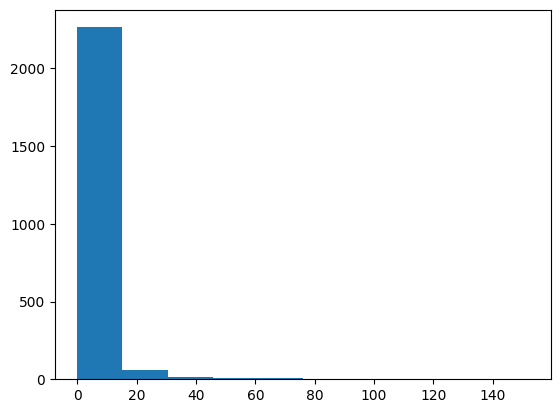

In [25]:
plt.hist(cnt)

Установим границу, ниже которой элементы будут относиться к типу other

In [26]:
low = 15

In [27]:
mas = []
for i, x in enumerate(a):
    if cnt2[i] > low:
        mas.append(x)
mas

['Oxford Diecast',
 'Preiser',
 'Party2u',
 'Crayola',
 'Hasbro',
 'Fiesta',
 'Disney',
 'Pams',
 'Playmobil',
 'Bburago',
 'Tobar',
 'Siku',
 'LEGO',
 'Thomas & Friends',
 'FunKo',
 'Papo',
 'Baker Ross',
 'Hornby',
 'Mattel',
 'Ty',
 'POP! Vinyl',
 'Generic',
 'Transformers',
 'Bigjigs Rail',
 'Scalextric',
 'FANCYDRESSCOZ',
 'k2-accessories Charm Pendants',
 'Hot Wheels',
 'Manhattan Toy',
 'Magic The Gathering',
 'Every-occasion-party-supplies',
 'Star Wars',
 'Hama',
 'Disney Junior',
 'Unknown',
 'Schleich',
 'Me To You',
 'The Puppet Company',
 'Marvel',
 'Town Square Miniatures',
 'The fancy dress and party store',
 'Oxford',
 'Q-Workshop',
 'Kato',
 'Amscan',
 'Powell Craft',
 'Chessex',
 "Smiffy's",
 'Pokémon',
 'Intex',
 'Disney Princess',
 'Corgi',
 'Revell-Monogram',
 'A.S.PUPPETS',
 'Star Cutouts Ltd',
 'Cheatwell Games',
 'Galt Toys',
 'Creative',
 'Brio',
 'Takara Tomy',
 'Wicked',
 'Partyrama',
 'Melissa & Doug',
 'Character Options',
 'Le Toy Van',
 'Bandai',
 'k2-acc

In [28]:
def manuf_change(x, mas):
    if x in mas:
        return x
    else:
        x = "other"
        return x

In [29]:
df.manufacturer = df.manufacturer.apply(lambda x: manuf_change(x, mas))
df.manufacturer

4396             other
6858             other
6535    Oxford Diecast
3323             other
91             Preiser
             ...      
5993             other
5129             other
5050    Oxford Diecast
8262             other
876               NECA
Name: manufacturer, Length: 8533, dtype: object

Количество уникальных элементов сильно уменьшилось

In [30]:
df.manufacturer.unique().shape[0]

96

# Колонка price (target)

In [31]:
y_train

4396      £1.50
6858     £22.00
6535      £6.60
3323      £2.95
91      £137.16
         ...   
5746     £24.99
5202      £7.90
5401      £1.32
865       £7.99
7282      £7.99
Name: price, Length: 5546, dtype: object

Приведем к вещественному типу колонку price

In [32]:
def price_float(x):
    x = x[1:]
    if ',' in x:
        ans = ""
        for s in x:
            if s != ',':
                ans += s
            return float(ans)
    return float(x)

Добавим таргет в датафрейм

In [33]:
df["price"] = pd.concat([y_train, y_test], axis = 0)
df.price

4396      £1.50
6858     £22.00
6535      £6.60
3323      £2.95
91      £137.16
         ...   
5993     £56.42
5129     £39.99
5050      £6.95
8262      £0.99
876      £19.11
Name: price, Length: 8533, dtype: object

In [34]:
df.price = df.price.apply(lambda x: price_float(x))
df.price

4396      1.50
6858     22.00
6535      6.60
3323      2.95
91      137.16
         ...  
5993     56.42
5129     39.99
5050      6.95
8262      0.99
876      19.11
Name: price, Length: 8533, dtype: float64

# Колонка number_available_in_stock

In [35]:
df.number_available_in_stock

4396    3 new
6858      NaN
6535    2 new
3323      NaN
91        NaN
        ...  
5993    2 new
5129    9 new
5050    5 new
8262      NaN
876     6 new
Name: number_available_in_stock, Length: 8533, dtype: object

Видно, что эту колонку можно разбить на 2

In [36]:
df.number_available_in_stock.unique()

array(['3\xa0new', nan, '2\xa0new', '10\xa0new', '4\xa0new', '14\xa0new',
       '6\xa0new', '18\xa0new', '5\xa0new', '38\xa0new', '37\xa0new',
       '11\xa0new', '13\xa0new', '8\xa0new', '7\xa0new', '21\xa0new',
       '16\xa0new', '28\xa0new', '17\xa0new', '45\xa0new', '29\xa0new',
       '27\xa0new', '12\xa0new', '49\xa0new', '9\xa0new', '22\xa0new',
       '19\xa0new', '25\xa0new', '23\xa0new', '36\xa0new', '39\xa0new',
       '15\xa0new', '20\xa0new', '1\xa0used', '26\xa0new', '34\xa0new',
       '40\xa0new', '32\xa0new', '41\xa0new', '30\xa0new', '24\xa0new',
       '46\xa0new', '31\xa0new', '1\xa0refurbished', '33\xa0new',
       '43\xa0new', '60\xa0new', '58\xa0new', '65\xa0new', '47\xa0new',
       '63\xa0new', '6\xa0used', '2\xa0used', '1\xa0collectible',
       '3\xa0used', '14\xa0used', '42\xa0new', '56\xa0new', '48\xa0new',
       '57\xa0new', '53\xa0new', '35\xa0new', '51\xa0new', '62\xa0new',
       '86\xa0new', '59\xa0new', '74\xa0new', '44\xa0new', '10\xa0used',
     

In [37]:
def devide_one(x):
    if (type(x)) == str:
        t = x.split()
        return int(t[0])
    else:
        return x

def devide_two(x):
    if (type(x)) == str:
        t = x.split()
        return t[1]
    else:
        return x

Добавим 2 новые колонки в датафрейм

In [38]:
df['number_avaible'] = df.number_available_in_stock.apply(lambda x: devide_one(x))
df.number_avaible

4396    3.0
6858    NaN
6535    2.0
3323    NaN
91      NaN
       ... 
5993    2.0
5129    9.0
5050    5.0
8262    NaN
876     6.0
Name: number_avaible, Length: 8533, dtype: float64

In [39]:
df["condition"] = df.number_available_in_stock.apply(lambda x: devide_two(x))
df.condition

4396    new
6858    NaN
6535    new
3323    NaN
91      NaN
       ... 
5993    new
5129    new
5050    new
8262    NaN
876     new
Name: condition, Length: 8533, dtype: object

Колонка condition является категориальной номинальной, так как непонятно как проставить номера категориям, поэтому закодируем(потом) при помощи one-hot

In [40]:
df['condition'].unique()

array(['new', nan, 'used', 'refurbished', 'collectible'], dtype=object)

Теперь из исходного датафрейма удалим колонку number_available_in_stock

In [41]:
df = df.drop(['number_available_in_stock'], axis=1)
df.head(5)

,manufacturer,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,price,number_avaible,condition
4396,other,8,2.0,4.6 out of 5 stars,"Party Supplies > Banners, Stickers & Confetti ...",1.50,3.0,new
6858,other,3,1.0,5.0 out of 5 stars,Dolls & Accessories > Soft Dolls,22.00,NaN,NaN
6535,Oxford Diecast,1,1.0,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,6.60,2.0,new
3323,other,1,2.0,5.0 out of 5 stars,Fancy Dress > Accessories > Masks,2.95,NaN,NaN
91,Preiser,1,1.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,137.16,NaN,NaN


# Колонка number_of_reviews

Изменим тип данных каждого элемента

In [42]:
df.number_of_reviews

4396    8
6858    3
6535    1
3323    1
91      1
       ..
5993    1
5129    1
5050    2
8262    3
876     4
Name: number_of_reviews, Length: 8533, dtype: object

In [43]:
def obj_to_float(x):
    x = str(x)
    if ',' in x:
        ans = ""
        for s in x:
            if s != ',':
                ans += s
                return float(ans)
    else:
        return float(x)

In [44]:
df.number_of_reviews = df.number_of_reviews.apply(lambda x: obj_to_float(x))
df.number_of_reviews

4396    8.0
6858    3.0
6535    1.0
3323    1.0
91      1.0
       ... 
5993    1.0
5129    1.0
5050    2.0
8262    3.0
876     4.0
Name: number_of_reviews, Length: 8533, dtype: float64

# Колонка average_review_rating

In [45]:
df.average_review_rating

4396    4.6 out of 5 stars
6858    5.0 out of 5 stars
6535    5.0 out of 5 stars
3323    5.0 out of 5 stars
91      5.0 out of 5 stars
               ...        
5993    5.0 out of 5 stars
5129    5.0 out of 5 stars
5050    5.0 out of 5 stars
8262    4.7 out of 5 stars
876     4.8 out of 5 stars
Name: average_review_rating, Length: 8533, dtype: object

Выделим из каждой строки только рейтинг и приведем к вещественному типу

In [46]:
def rating(x):
    x = str(x)
    x = x.split()
    return float(x[0])

In [47]:
df.average_review_rating = df.average_review_rating.apply(lambda x: rating(x))
df.average_review_rating

4396    4.6
6858    5.0
6535    5.0
3323    5.0
91      5.0
       ... 
5993    5.0
5129    5.0
5050    5.0
8262    4.7
876     4.8
Name: average_review_rating, Length: 8533, dtype: float64

# Колонка amazon_category_and_sub_category

In [48]:
df.amazon_category_and_sub_category

4396    Party Supplies > Banners, Stickers & Confetti ...
6858                     Dolls & Accessories > Soft Dolls
6535    Die-Cast & Toy Vehicles > Toy Vehicles & Acces...
3323                    Fancy Dress > Accessories > Masks
91      Hobbies > Model Trains & Railway Sets > Rail V...
                              ...                        
5993       Figures & Playsets > Science Fiction & Fantasy
5129    Die-Cast & Toy Vehicles > Toy Vehicles & Acces...
5050    Die-Cast & Toy Vehicles > Toy Vehicles & Acces...
8262    Arts & Crafts > Children's Craft Kits > Bead A...
876        Figures & Playsets > Science Fiction & Fantasy
Name: amazon_category_and_sub_category, Length: 8533, dtype: object

Число уникальных индексов довольно велико

In [49]:
df.amazon_category_and_sub_category.unique().shape

(236,)

Также как и с колонкой manufacturer посчитаем встречаемость каждого элемента

In [50]:
a = df.amazon_category_and_sub_category.unique()
b = np.array(df.amazon_category_and_sub_category)
cnt = np.zeros(a.shape[0])
c = False

for x in b:
    for j, y in enumerate(a):
        if x==y:
            cnt[j] += 1
            c = True
        if c:
            c = False
            break

In [51]:
cnt2 = np.copy(cnt)
cnt.sort()
cnt

array([  0.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
         2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
         2.,   2.,   2.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,
         3.,   3.,   3.,   3.,   3.,   4.,   4.,   4.,   4.,   4.,   4.,
         4.,   4.,   5.,   5.,   5.,   5.,   5.,   6.,   6.,   6.,   6.,
         6.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,   8.,   8.,
         8.,   9.,   9.,   9.,  10.,  10.,  10.,  1

(array([207.,  15.,   6.,   5.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([  0. ,  78.4, 156.8, 235.2, 313.6, 392. , 470.4, 548.8, 627.2,
        705.6, 784. ]),
 <BarContainer object of 10 artists>)

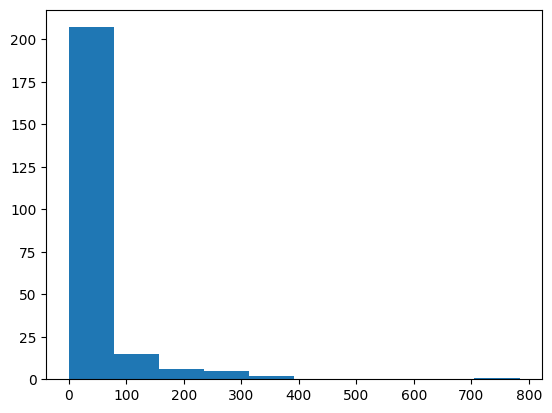

In [52]:
plt.hist(cnt)

Установим границу, ниже которой элементы будут попадать в other

In [53]:
low = 100

In [54]:
mas = []
for i, x in enumerate(a):
    if cnt2[i] >= low:
        mas.append(x)
#mas

In [55]:
def amazon_change(x, mas):
    if x in mas:
        return x
    else:
        x = "other"
        return x

In [56]:
df.amazon_category_and_sub_category = df.amazon_category_and_sub_category.apply(lambda x: amazon_change(x, mas))
#df.amazon_category_and_sub_category

Размерность уменьшилась

In [57]:
df.amazon_category_and_sub_category.unique().shape

(26,)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8533 entries, 4396 to 876
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   manufacturer                      8533 non-null   object 
 1   number_of_reviews                 8523 non-null   float64
 2   number_of_answered_questions      8533 non-null   float64
 3   average_review_rating             8523 non-null   float64
 4   amazon_category_and_sub_category  8533 non-null   object 
 5   price                             8533 non-null   float64
 6   number_avaible                    6332 non-null   float64
 7   condition                         6332 non-null   object 
dtypes: float64(5), object(3)
memory usage: 600.0+ KB


Кодирование (с помощью OneHot)

In [59]:
col = ["manufacturer", "amazon_category_and_sub_category", "condition"]
ohe = pd.get_dummies(df, columns = col)
ohe

,number_of_reviews,number_of_answered_questions,average_review_rating,price,number_avaible,manufacturer_A.S.PUPPETS,manufacturer_AUTOart,manufacturer_Amscan,manufacturer_Bachmann,manufacturer_Baker Ross,...,amazon_category_and_sub_category_Jigsaws & Puzzles > Jigsaws,"amazon_category_and_sub_category_Party Supplies > Banners, Stickers & Confetti > Banners",amazon_category_and_sub_category_Party Supplies > Decorations > Balloons,amazon_category_and_sub_category_Puppets & Puppet Theatres > Hand Puppets,amazon_category_and_sub_category_Sports Toys & Outdoor > Kites & Flight Toys,amazon_category_and_sub_category_other,condition_collectible,condition_new,condition_refurbished,condition_used
4396,8.0,2.0,4.6,1.50,3.0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
6858,3.0,1.0,5.0,22.00,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6535,1.0,1.0,5.0,6.60,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3323,1.0,2.0,5.0,2.95,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,1.0,1.0,5.0,137.16,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5993,1.0,1.0,5.0,56.42,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5129,1.0,1.0,5.0,39.99,9.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5050,2.0,2.0,5.0,6.95,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8262,3.0,3.0,4.7,0.99,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Обратно разделим данные на тестовую и тренировочную часть(таргет внутри)

In [60]:
X_train = ohe[:len(X_train)]
X_test = ohe[len(X_train):]


Выкинем все строки, где есть хотя бы один NaN

In [61]:
X_train = X_train.drop(index=X_train[X_train.isna().sum(axis=1) > 0].index)

In [62]:
X_test = X_test.drop(index=X_test[X_test.isna().sum(axis=1) > 0].index)

выделяем таргет

In [63]:
X_train, y_train = X_train.drop(columns="price"), X_train.price
X_test, y_test = X_test.drop(columns="price"), X_test.price

# Обучение модели

## Бейзлайн

Обучите базовую модель. Для этого используем `sklearn.dummy.DummyRegressor`.  Посчитаем MSE, RMSE.

In [64]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor()
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)

In [65]:
# Проверьте качество бейзлайна
from sklearn.metrics import mean_squared_error as mse

print("MSE: ", mse(y_test, y_pred))
print("RMSE: ", mse(y_test, y_pred, squared=False))

MSE:  1544.5857509239759
RMSE:  39.30121818625952


## Дерево решений


In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error as mse
from sklearn.metrics import r2_score

In [67]:
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [68]:
print("MSE: ", mse(y_test, y_pred))
print("RMSE: ", mse(y_test, y_pred, squared=False))
print("r2_score:", r2_score(y_test, y_pred))

MSE:  1447.0050780214622
RMSE:  38.039519949934466
r2_score: 0.06187802046028579


Качество улучшилось. Так как в двух категориальных колонках датафрейма было много уникальных элементов, то для OneHot кодирования большинство элементов я выделил в тип other, немного пришлось поподбирать границу занесения элементов в тип other, потому что при слишком высокой границе ошибка на дереве увеличивалась и становилась больше, чем dummy

## Линейная регрессия


In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [71]:
print("MSE: ", mse(y_test, y_pred))
print("RMSE: ", mse(y_test, y_pred, squared=False))
print("r2_score:", r2_score(y_test, y_pred))

MSE:  1373.6145103013955
RMSE:  37.06230578770559
r2_score: 0.10945857543887105


В линейной регрессии качество улучшилось. При кодировании всех уникальных элементов в категорильных признаках качество модели ухудшалось очень сильно, MSE было 1.14е+20.

# Гиперпараметры 

In [72]:
import seaborn as sns


def plot_fitting_curve(parameter: str, values: list, X_train, X_test, y_train, y_test):
    train_curve = []
    test_curve = []
    for value in values:
        model = DecisionTreeRegressor(**{parameter: value})
        model.fit(X_train, y_train)
        y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)
        train_curve.append(mse(y_train, y_pred_train))
        test_curve.append(mse(y_test, y_pred_test))
    sns.lineplot(x=values, y=train_curve, label='train')
    sns.lineplot(x=values, y=test_curve, label='test').set_title(f'{parameter}')

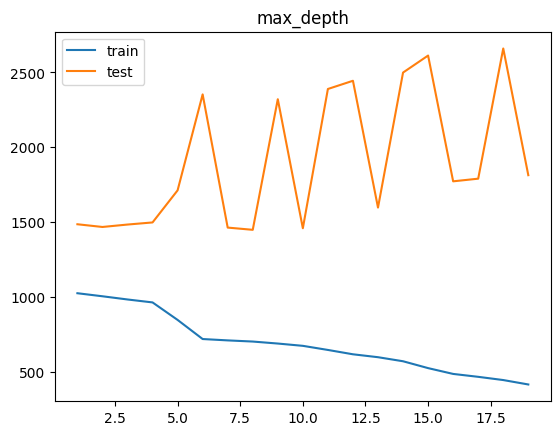

In [73]:
plot_fitting_curve('max_depth', np.arange(1, 20), X_train, X_test, y_train, y_test)

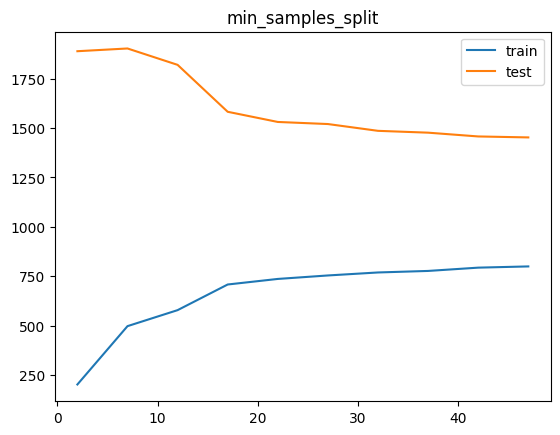

In [74]:
plot_fitting_curve('min_samples_split', np.arange(2, 52, 5), X_train, X_test, y_train, y_test)

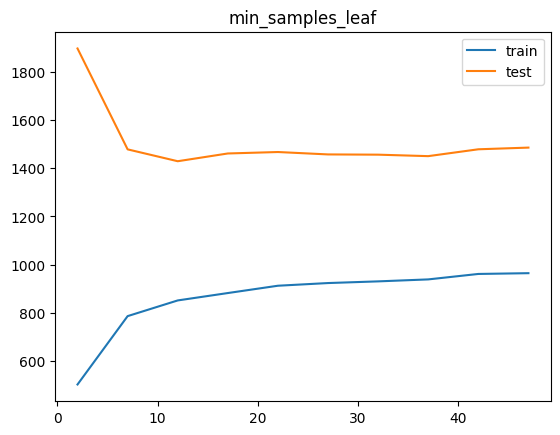

In [75]:
plot_fitting_curve('min_samples_leaf', np.arange(2, 52, 5), X_train, X_test, y_train, y_test)

# Простое ансамблирование

В этой секции мы реализуем простой ансамбль деревьев.

In [76]:
class EnsembleTreeRegressor:
    def __init__(self, num_trees, samples_frac, **model_kwargs):
        self._samples_frac = samples_frac
        self._trees = [DecisionTreeRegressor(**model_kwargs) for _ in range(num_trees)]

    def fit(self, x: pd.DataFrame, y: pd.Series):
        for tree in self._trees:
            tree_x = x.sample(frac=self._samples_frac, random_state=42)
            tree_y = y[tree_x.index]
            tree.fit(tree_x, tree_y)

    def predict(self, x: pd.DataFrame):
        # В качестве предсказания ансамбля будем выдавать усреднение предсказаний деревьев
        mas = []
        for tree in self._trees:
            mas.append(tree.predict(x))
        return sum(mas) / len(mas)

In [77]:
tree = EnsembleTreeRegressor(num_trees=5, samples_frac=0.8)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [78]:
print("MSE: ", mse(y_test, y_pred))
print("RMSE: ", mse(y_test, y_pred, squared=False))
print("r2_score:", r2_score(y_test, y_pred))

MSE:  1848.2559549125026
RMSE:  42.99134744239244
r2_score: -0.19826085025865026


Ансамбли показали лучше хуже, чем у деревьев, возможно необходимо подобрать гиперпараметры

In [110]:
def ansambli_plot_fitting_curve(parameter: str, values: list, X_train, X_test, y_train, y_test, num, frac):
    train_curve = []
    test_curve = []
    for value in values:
        model = EnsembleTreeRegressor(num_trees=num, samples_frac=frac, **{parameter: value})
        model.fit(X_train, y_train)
        y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)
        train_curve.append(mse(y_train, y_pred_train))
        test_curve.append(mse(y_test, y_pred_test))
    sns.lineplot(x=values, y=train_curve, label='train')
    sns.lineplot(x=values, y=test_curve, label='test').set_title(f'{parameter}' +", num_trees=" f'{num}' + ", sample_frac=" + f'{frac}')

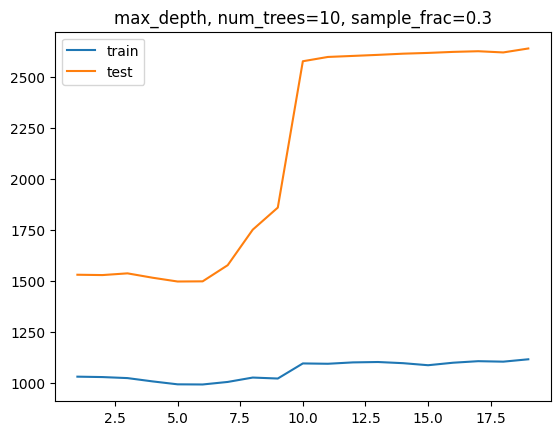

In [118]:
ansambli_plot_fitting_curve('max_depth', np.arange(1, 20), X_train, X_test, y_train, y_test, 10, 0.3)

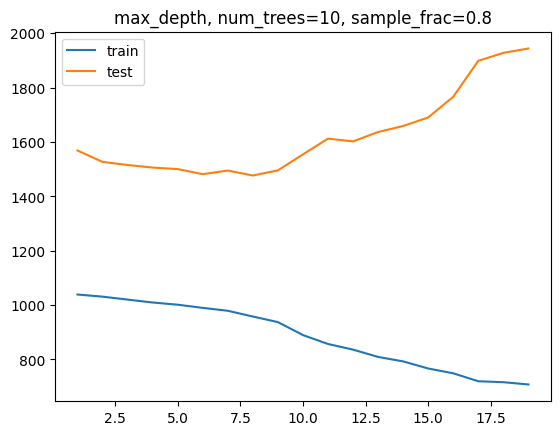

In [119]:
ansambli_plot_fitting_curve('max_depth', np.arange(1, 20), X_train, X_test, y_train, y_test, 10, 0.8)

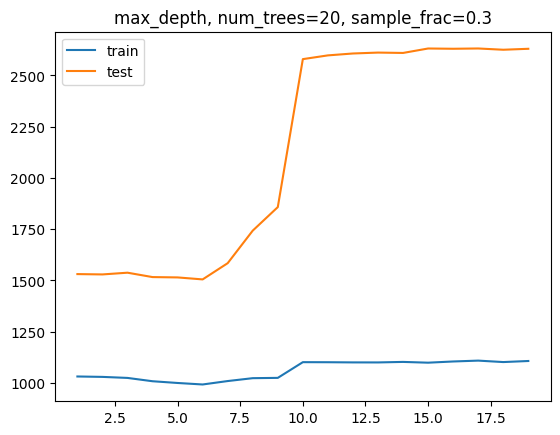

In [120]:
ansambli_plot_fitting_curve('max_depth', np.arange(1, 20), X_train, X_test, y_train, y_test, 20, 0.3)

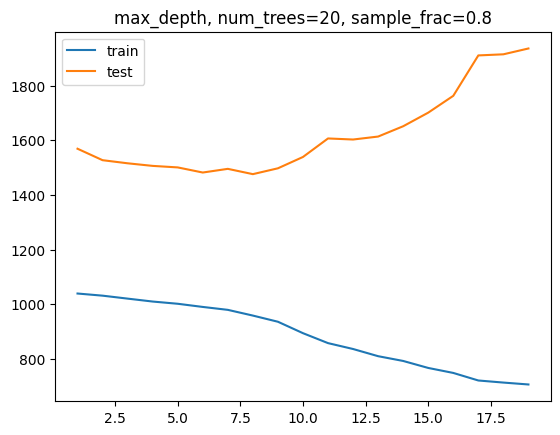

In [121]:
ansambli_plot_fitting_curve('max_depth', np.arange(1, 20), X_train, X_test, y_train, y_test, 20, 0.8)

Кол-во деревьев не особо влияет на max_depth, а вот при увеличении sample_frac увеличивается и глубина дерева